# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from numpy import inf

%pylab inline
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

import io
import os
import zipfile

#function to download from the url

def getGuardiansCSV(url, cache_name=None, is_zip=False, saved=False, **kwargs):
    cache_name = cache_name or os.path.basename(url)
    csv_file = os.path.join(os.getenv('PUIDATA', './'), cache_name)
    
    if os.path.isfile(csv_file) and not saved:
        print('Loading from:', csv_file)
        return pd.read_csv(csv_file) 
    else:
        print('Not in PUIDATA. Loading from url.')
        if is_zip:
            # Get zip buffer
            remotezip = urllib.urlopen(url).read()

            # Open in memory
            with zipfile.ZipFile(io.BytesIO(remotezip)) as z:
                # Read the filename or the first file if there are naming inconsistencies
                read_zip_file = cache_name if cache_name in z.namelist() else z.namelist()[0]
                df = pd.read_csv(z.open(read_zip_file), **kwargs)
        else:
            df = pd.read_csv(urllib.urlopen(url), **kwargs)

        # Save dataframe as cached 
        df.to_csv(csv_file, index=False)
    return df

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#fetching population data of the countries
dfpop = getGuardiansCSV(
    'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv', 
    is_zip=True, skiprows=4, cache_name='API_SP.POP.TOTL_DS2_en_csv_v2.csv'#, saved=True
).dropna(how='all', axis=1)
#df_pop = df_pop[['Country Name', '2012']].rename(columns={'2012': 'pop'})
dfpop.head()

Loading from: /home/cusp/ic1018/PUIdata/API_SP.POP.TOTL_DS2_en_csv_v2.csv


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [3]:
#changing the column's name 
dfpop = dfpop[['Country Name', '2012']].rename(columns={'2012': 'pop'})
dfpop.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [4]:
#fetching the GDP data of the countries
dfgdp = getGuardiansCSV(
    'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv', 
    is_zip=True, skiprows=4, cache_name='API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', saved=True
).dropna(how='all', axis=1)
dfgdp.head()

Not in PUIDATA. Loading from url.


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,8.963316e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN


In [5]:
#changing the column's name
dfgdp = dfgdp[['Country Name', '2012']].rename(columns={'2012': 'gdp'})
dfgdp.head()


,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [6]:
#fetching the data from my GitHub online
dfguns = getGuardiansCSV(
    'https://github.com/ishacusp/PUI2017_ic1018/raw/master/HW5_ic1018/data-pvLFI.csv'
)
dfguns.head()

Loading from: /home/cusp/ic1018/PUIdata/data-pvLFI.csv


,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [7]:

dfgoogle =  getGuardiansCSV(
    'https://docs.google.com/spreadsheet/ccc?key=1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs&output=csv', 
    cache_name='API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', saved=True
)
dfgoogle.head()


Not in PUIDATA. Loading from url.


,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [8]:
dfgoogle = dfgoogle[
    ['Country/Territory', 'Average total all civilian firearms', 'Number of homicides by firearm']
]
dfgoogle.head()

,Country/Territory,Average total all civilian firearms,Number of homicides by firearm
0,Albania,270000.0,56.0
1,Algeria,1900000.0,20.0
2,Angola,2800000.0,NaN
3,Anguilla,NaN,1.0
4,Argentina,3950000.0,1198.0


In [9]:
#Merging all the datasets and making the final version look like professor's data after merging
df1 = dfgoogle.merge(dfpop, right_on = "Country Name", left_on = "Country/Territory")
df2 = df1.merge(dfgdp, right_on = "Country Name", left_on = "Country Name")
df_ = df2.merge(dfguns, right_on = "Country", left_on = "Country Name")
del df_['Country Name']

df_=df_.rename(columns={'Country/Territory': 'Country Name'})
df_.head()


,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,30.0,22728254.0,1.538194e+12,Australia,15.0,4
1,Austria,2500000.0,18.0,8429991.0,4.074516e+11,Austria,30.4,1
2,Canada,9950000.0,173.0,34750545.0,1.824289e+12,Canada,30.8,4
3,Denmark,650000.0,15.0,5591572.0,3.271489e+11,Denmark,12.0,0
4,Finland,2400000.0,24.0,5413971.0,2.567065e+11,Finland,45.3,2


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


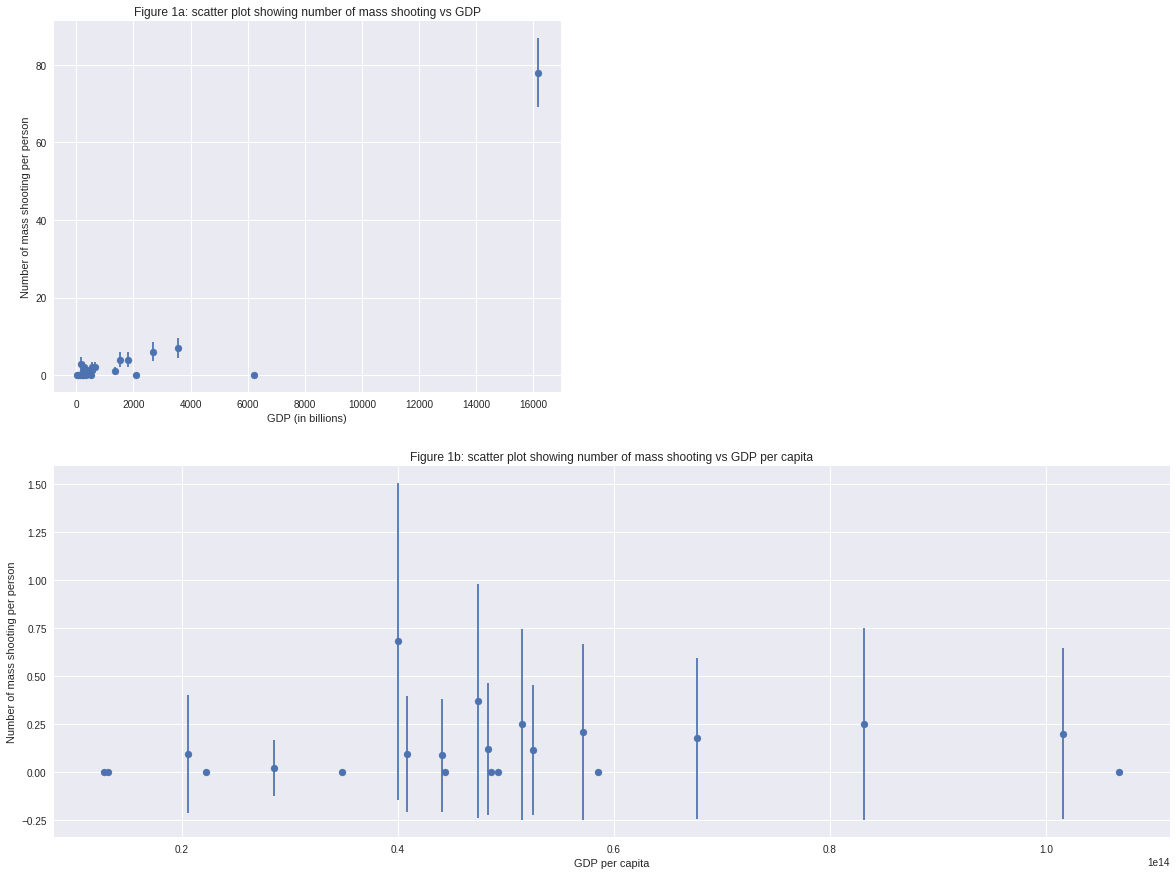

In [11]:
fig = pl.figure(figsize=(20,15)) 
ax = fig.add_subplot(2,2,1)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
ax.set_title('Figure 1a: scatter plot showing number of mass shooting vs GDP')

#print ("Number of mass shooting vs GDP, " + 
       #"errors represent Poisson statistics.\n" + 
       #"The datapoint to the top right of the plot is the USA, " + 
    #"which has noth the highest GDP and the highest number of mass shootings")

ax1 = fig.add_subplot(2,1,2)
df_['gdp_pop'] = df_['gdp']/df_['pop'] * 1e9
df_['shootingpop'] = df_['Number of mass shootings']/df_['pop'] * 1e6
scatter1 = ax1.scatter(df_['gdp_pop'], df_['shootingpop'])
ax1.errorbar(df_['gdp_pop'], df_['shootingpop'], 
            yerr = np.sqrt((df_['Number of mass shootings'])/df_['pop'] *1e6), fmt = '.')
ax1.set_xlabel("GDP per capita")
ax1.set_ylabel("Number of mass shooting per person")
ax1.set_ylim()
ax1.set_title('Figure 1b: scatter plot showing number of mass shooting vs GDP per capita')

#pl.show()


pl.show()


Figure 1a: The number of mass shootings vs. GDP, errors represent Poisson statistics. The datapoint to the top right of the plot is the US which has the highest GDP and number of mass shootings.

Figure 1b: The number of mass shootings per GDP per capita. The datapoint point on the right of the plot is the US.

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

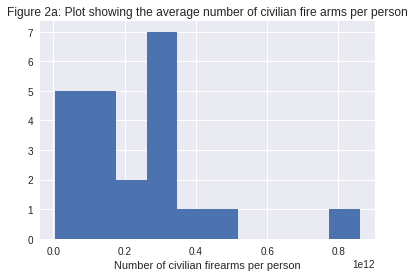

In [12]:
df_['shootingspop'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

fig = pl.figure(figsize=(15,4))
fig, ax = plt.subplots()
#plotting average number of civilian fire arms per person without errors
df_['armspop'] = df_['Average total all civilian firearms']/df_['pop'] *1e9
ax.hist(df_['armspop'] * 1000)
ax.set_xlabel('Number of civilian firearms per person')

pl.title('Figure 2a: Plot showing the average number of civilian fire arms per person')

pl.show()

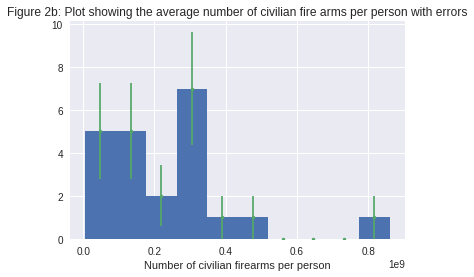

In [13]:
fig = pl.figure(figsize=(15,4))
fig, ax1 = plt.subplots()
#plotting average number of civilian fire arms per person with errors
ax1.hist(df_['armspop'])

y,binEdges = np.histogram(df_['armspop'],bins=10)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
ax1.errorbar(bincenters, y, yerr=np.sqrt(y), fmt='.')

ax1.set_xlabel("Number of civilian firearms per person")
pl.title('Figure 2b: Plot showing the average number of civilian fire arms per person with errors')
pl.show()

The last point on the right of the plot with x = 0.8 is the outlier. Apart from that most countries have low civilian firearms rate. The error bars are quite big and well spread around the mean, showing that the data have a large spread around the mean.

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

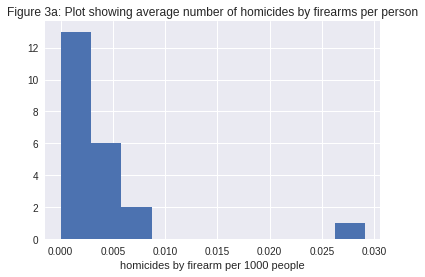

In [14]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');
pl.title('Figure 3a: Plot showing average number of homicides by firearms per person')

The histogram shows the most of the countries have low homocide by firearm rate, except in one case (see the extreme right point on the plot)

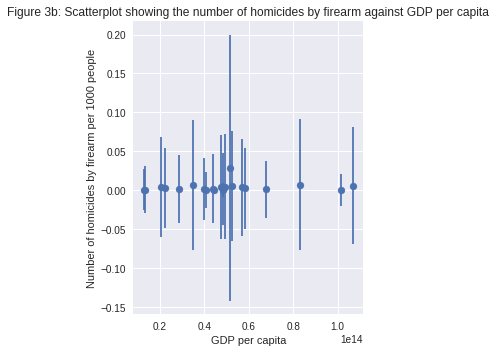

In [15]:
fig3 = pl.figure(figsize=(10,5)) 
ax = fig3.add_subplot(121)
#plotting against country GDP with errors
df_['homicidepop'] = df_['Number of homicides by firearm'] / df_['pop'] * 1000
df_['gdp_pop'] = df_['gdp']/df_['pop'] * 1e9

scatter3 = ax.scatter(df_['gdp_pop'], df_['homicidepop'])
ax.errorbar(df_['gdp_pop'], df_['homicidepop'], 
            yerr = np.sqrt((df_['Number of homicides by firearm'])/df_['pop'] *1000), fmt = '.')
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Number of homicides by firearm per 1000 people")
ax.set_ylim()
pl.title('Figure 3b: Scatterplot showing the number of homicides by firearm against GDP per capita')
pl.tight_layout()
pl.show()

The scatter plot shows that homicides by firearm rate do not increase with increasing GDP per capita. The errorbars shows some of the data have larger spread around the mean, that is the mean of these countries are not fully accurate, hence less reliability. 

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


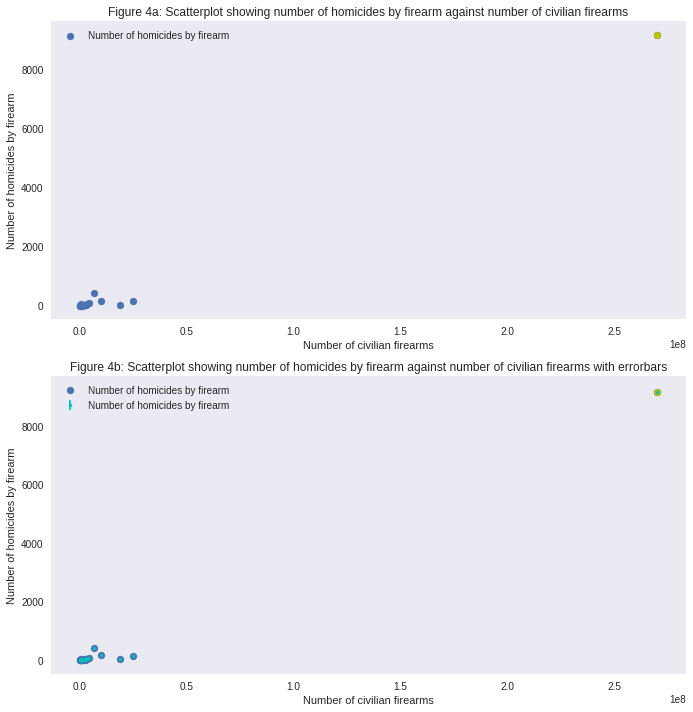

In [16]:
fig4 = pl.figure(figsize=(10, 10)) 
ax4 = fig4.add_subplot(211)
#plot number of homicides by fire arm against number of civilian firearms without errorbars
df_['homiarms'] = df_['Number of homicides by firearm'] / df_['Average total all civilian firearms'] * 1000
scatter = ax4.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
usa = ax4.plot(df_['Average total all civilian firearms'][21], df_['Number of homicides by firearm'][21], 'yo')
ax4.set_xlabel("Number of civilian firearms")
ax4.set_ylabel("Number of homicides by firearm")
ax4.set_ylim()
ax4.legend()
ax4.grid()
pl.title('Figure 4a: Scatterplot showing number of homicides by firearm against number of civilian firearms')


ax5 = fig4.add_subplot(212)
#plot number of homicides by firearm against the number of civilian firearms with errorbars
scatter = ax5.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
usa = ax5.plot(df_['Average total all civilian firearms'][21], df_['Number of homicides by firearm'][21], 'yo')
ax5.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm']), fmt = 'c.')
ax5.set_xlabel("Number of civilian firearms")
ax5.set_ylabel("Number of homicides by firearm")
ax5.set_ylim()
ax5.legend()
ax5.grid()
pl.title('Figure 4b: Scatterplot showing number of homicides by firearm against number of civilian firearms with errorbars')
#pl.show()
pl.tight_layout()
pl.show()

The figures shows that the countries with low average totaly civilian firearms also have low number of homicides by firearms. Most countries are clusteres towards the lower end except one country with higher number of both total civilian firearms and homicides by firearms. The errorbars are small showing the spread of values is small, thus having high concentration and high certainty and low variance.

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


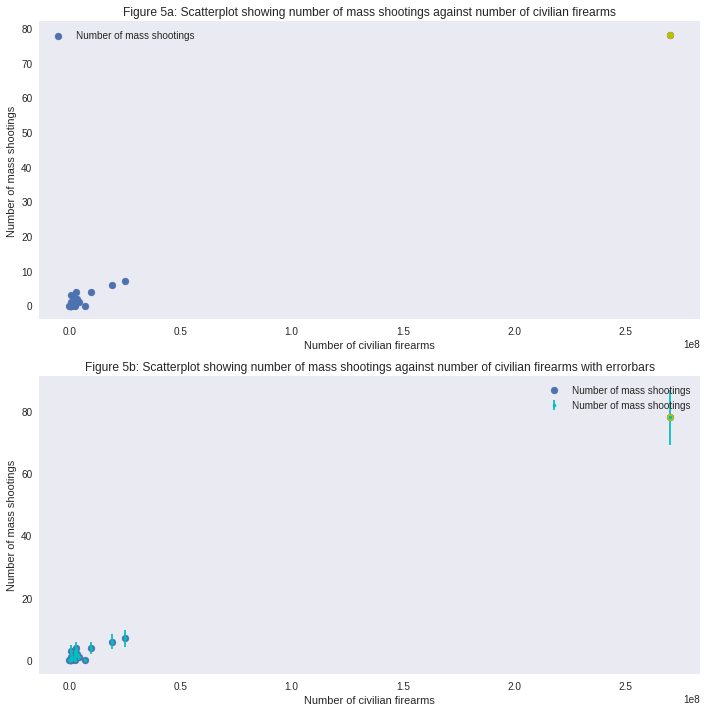

In [17]:

# plot mass shooting against number of civilian firearms
fig5 = pl.figure(figsize=(10,10)) 
ax6 = fig5.add_subplot(211)
#first plot numer of mass shootings against number of civilian firearms without errorbars

scatter = ax6.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'])
usa = ax6.plot(df_['Average total all civilian firearms'][21], df_['Number of mass shootings'][21], 'yo')
ax6.set_xlabel("Number of civilian firearms")
ax6.set_ylabel("Number of mass shootings")
pl.title('Figure 5a: Scatterplot showing number of mass shootings against number of civilian firearms')
ax6.legend()
ax6.grid()
ax6.set_ylim()

ax7 = fig5.add_subplot(212)
#plot number of homicides by firearm against the number of civilian firearms with errorbars
scatter = ax7.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'])
usa = ax7.plot(df_['Average total all civilian firearms'][21], df_['Number of mass shootings'][21], 'yo')
ax7.errorbar(df_['Average total all civilian firearms'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings']), fmt = 'c.')
ax7.set_xlabel("Number of civilian firearms")
ax7.set_ylabel("Number of mass shootings")
ax7.set_ylim()
ax7.grid()
ax7.legend()
pl.title('Figure 5b: Scatterplot showing number of mass shootings against number of civilian firearms with errorbars')


pl.tight_layout()
pl.show()

The figures shows that the countries with low number of civilian firearms also have low number of mass shootings. Most countries are clusteres towards the lower end except one country with higher number of both civilian firearms and mass shootings. The errorbars are small showing the spread of values is small, thus having high concentration and high certainty, except for US which has larger error bar, showing low certainty and higher variance of the data.

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [18]:
#calculating mean
df_['shootpop'] = df_['Number of mass shootings']/df_['pop']*1e6
df_['armspop'] = df_['Average total all civilian firearms']/df_['pop']
print (df_['shootpop'].mean())

print (df_['armspop'].mean())
#check that both variables are roughly the same order of magnitude

0.121021254397
0.228950085729


In [19]:
#performing regression
lm = smf.ols(formula='shootpop ~ armspop', data=df_).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               shootpop   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Wed, 18 Oct 2017   Prob (F-statistic):             0.0374
Time:                        23:55:32   Log-Likelihood:                 11.424
No. Observations:                  22   AIC:                            -18.85
Df Residuals:                      20   BIC:                            -16.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0315      0.051      0.612      0.548        -0.076     0.139
armspop        0.3911      0.175      2.230      0.037         0.025     0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
yerror = np.sqrt(df_['shootpop'])
error_weight= list(1.0/yerror)
print(error_weight)

[2.3837079309344924, 2.903444678308853, 2.9474796436956101, inf, 1.645291919386952, 3.3080656482804769, 3.3896022311938436, inf, inf, inf, inf, inf, inf, inf, 1.2121743548956425, 2.2402171769719113, inf, 3.2426600191817831, 6.8390829063552081, 2.1816706900905096, 1.9996075865029117, 2.0063948374110572]


In [28]:
#there are infinity values in weights, assign inf as 1 
wt = np.array(error_weight)
wt[wt == inf] = 1
wt.tolist()
lm2 = smf.wls(formula='shootpop ~ armspop', data=df_, weights=wt).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:               shootpop   R-squared:                       0.228
Model:                            WLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     5.915
Date:                Wed, 18 Oct 2017   Prob (F-statistic):             0.0245
Time:                        23:56:31   Log-Likelihood:                 14.272
No. Observations:                  22   AIC:                            -24.54
Df Residuals:                      20   BIC:                            -22.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0357      0.044      0.816      0.424        -0.056     0.127
armspop        0.3580      0.147      2.432      0.025         0.051     0.665
==============================================================================
Omnibus:                       28.903   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.630
Skew:                           2.372   Prob(JB):                     1.37e-12
Kurtosis:                       9.090   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#least squares polynomial fit
#fit a polynomial of degree 1 to our variables
#returns a vector of coefficients that minimises the squared error
coeff1, coeff2 = np.polyfit(df_['armspop'], df_['shootpop'], 1)
print(coeff1, coeff2)

0.391060034483 0.0314880259769


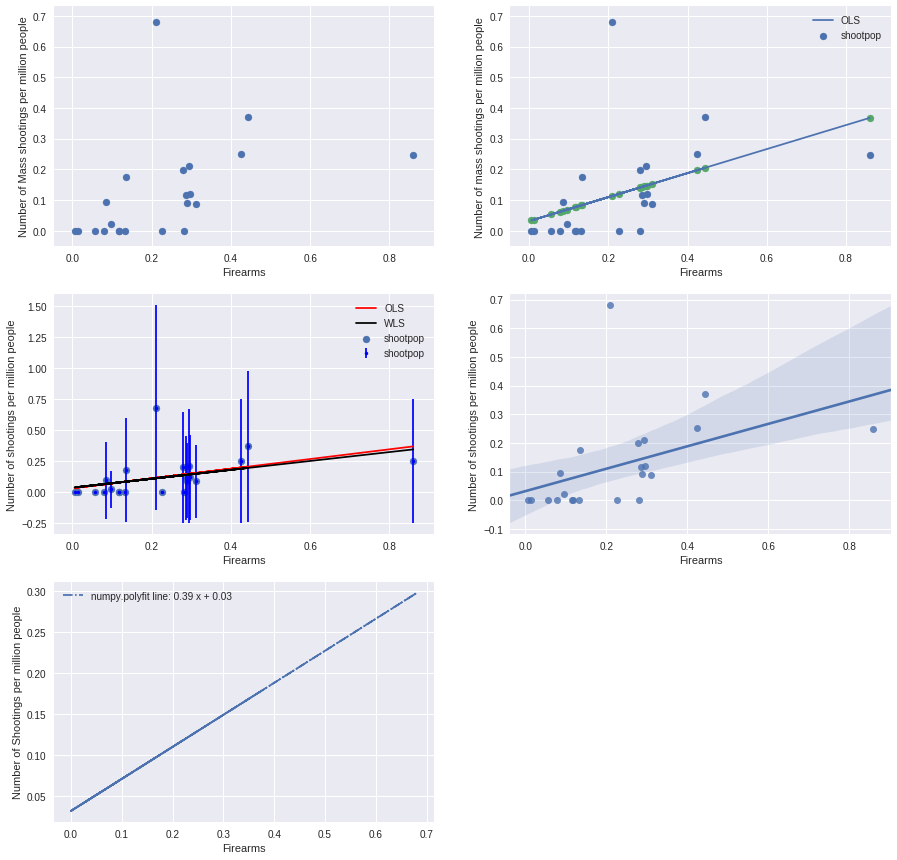

In [30]:
fig = pl.figure(figsize=(15, 15))

y_fit = lm.fittedvalues
y_fit2 = lm2.fittedvalues
y = df_['shootpop']

ax = fig.add_subplot(321)
ax.scatter(df_['armspop'],df_['shootpop'])
ax.set_xlabel('Firearms')
ax.set_ylabel('Number of Mass shootings per million people')


ax2 = fig.add_subplot(322)
ax2.scatter(df_['armspop'], df_['shootpop'])
ax2.plot(df_['armspop'], y_fit, label = 'OLS')
ax2.scatter(df_['armspop'],y_fit)
ax2.set_xlabel('Firearms')
ax2.set_ylabel('Number of mass shootings per million people')
ax2.legend()

ax3 = fig.add_subplot(323)
ax3.scatter(df_['armspop'], df_['shootpop'])
ax3.plot(df_['armspop'], y_fit, label = 'OLS', color='red')
ax3.plot(df_['armspop'],y_fit2, label = 'WLS', color='black')
ax3.errorbar(df_['armspop'], df_['shootpop'], 
            yerr = np.sqrt(df_['shootpop']), fmt = 'b.')
ax3.set_xlabel('Firearms')
ax3.set_ylabel('Number of shootings per million people')
ax3.legend()

ax4 = fig.add_subplot(324)
sns.regplot(x = df_['armspop'], y = df_['shootpop'], data=df_)
ax4.set_xlabel('Firearms')
ax4.set_ylabel('Number of shootings per million people')

ax5 = fig.add_subplot(325)
ax5.plot(df_['shootpop'], df_['shootpop'] * coeff1 + coeff2, '-.',label="numpy.polyfit line: %.2f x + %.2f"%(coeff1, coeff2))
ax5.set_xlabel('Firearms')
ax5.set_ylabel('Number of Shootings per million people')
ax5.legend()
plt.show()


## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [ ]:
sm.graphics.influence_plot(lm, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings